In [44]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
all_muts_df = pd.read_pickle("./data/4_8_df.pkl")
display(all_muts_df.shape)

(2820, 47)

In [62]:
d = dict()
for _, m in all_muts_df.iterrows():
    for gf in m["genomic features"]:
        ft = gf["feature type"]
        if ft == "unknown":
            ft = "intergenic"
        ft_id = gf["RegulonDB ID"]  # more accurate representation than "name" since TFBS currently can be given same name
        for ac in gf['significantly associated conditions']:
            if ac not in d.keys():
                d[ac] = dict()
            if ft not in d[ac].keys():
                d[ac][ft] = set()  # enforces unique features
            d[ac][ft].add(ft_id)

cnt_d = dict()
for c, ft_d in d.items():
    cnt_d[c] = dict()
    for ft, fs in ft_d.items():
        cnt_d[c][ft] = len(fs)

cond_assoc_mut_uniq_feat_cnt_df = pd.DataFrame(cnt_d)
cond_assoc_mut_uniq_feat_cnt_df = cond_assoc_mut_uniq_feat_cnt_df.fillna(0)
cond_assoc_mut_uniq_feat_cnt_df = cond_assoc_mut_uniq_feat_cnt_df.astype(int)
cond_assoc_mut_uniq_feat_cnt_df = cond_assoc_mut_uniq_feat_cnt_df.rename(columns=
               {"42 celsius":"42 Celsius", "30 celsius":"30 Celsius",
                "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.":"glycine, L-serine"})
cond_assoc_mut_uniq_feat_cnt_df

,42 Celsius,glucose(4),NaCl(0.5g/L) trace elements,U-13C glucose(2),30 Celsius,glycerol(2.5),glucose(2),20uM FeSO4 and 10mM sodium citrate,WT,D-2-deoxyribose,D-arabinose,D-lyxose,m-tartrate,monomethyl succinate,Δpgi,ΔsdaA ΔsdaB ΔtdcG ΔglyA,"glycine, L-serine",acetate(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),xylose(4),2 3-butanediol,adipic acid,coumaric acid,glutaric acid,hexamethylenediamine,hexanoic acid,isobutyric acid,n-butanol,octanoic acid,propanediol,putrescine,GMOS,Δgnd,Δpts,Δsdh,Δtpi
gene,83,25,11,13,29,31,18,11,0,0,7,9,38,2,24,16,16,12,17,9,8,29,22,26,7,33,56,19,3,24,19,3,23,13,11,16,12,19
intergenic,20,1,0,1,13,13,1,2,0,0,1,1,1,1,3,0,0,1,3,1,1,2,2,3,1,6,13,2,1,0,2,0,7,0,1,2,0,1
promoter,16,8,2,3,5,6,2,2,0,0,0,0,45,1,4,5,5,1,5,0,0,4,10,8,0,15,6,7,0,12,8,1,3,1,3,5,1,3
terminator,2,1,0,0,4,4,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
attenuator terminator,2,1,1,1,4,4,0,0,0,0,0,0,6,0,1,0,0,0,2,1,0,1,1,1,5,0,2,0,5,2,0,1,2,0,1,1,1,1
TFBS,6,5,9,2,1,1,14,2,2,59,0,0,15,0,3,1,1,0,0,0,7,1,8,2,17,2,4,5,20,5,3,0,3,0,1,0,0,2
RBS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Experimental conditions have varying amounts\nand types of associated unique mutated features')

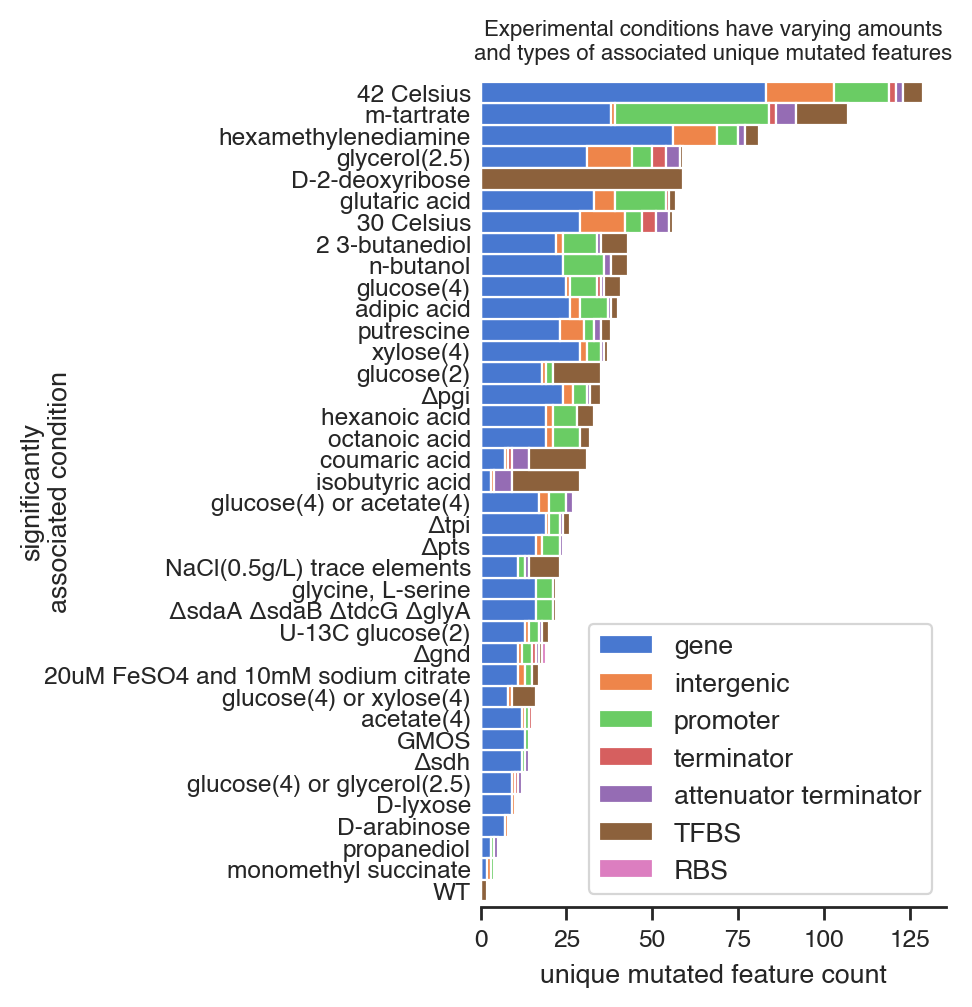

In [100]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
# plt.rcParams['image.cmap']='Set2'
sns.set_context("paper")
sns.set_style("ticks")
sns.set_palette("muted")

df = cond_assoc_mut_uniq_feat_cnt_df.copy()
df = df.T
df["tot"] = df.sum(axis=1)
df = df.sort_values(by="tot")
df = df.drop(columns="tot")
ax = df.plot.barh(stacked=True, width=1, figsize=(3,5.5),
#                   cmap="Set2"
                 )

plt.tick_params(
    axis='y',
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica', style='normal',)
ax.legend(prop=font)

ax.set_xlabel("unique mutated feature count", fontname="Helvetica")
ax.set_ylabel("significantly\nassociated condition", fontname="Helvetica")
ax.yaxis.labelpad = -10
ax.axes.set_title("Experimental conditions have varying amounts\nand types of associated unique mutated features", fontsize=8, fontname="Helvetica")

Text(0.5, 1.0, 'Some mutated features are associated with\nmultiple experimental conditions')

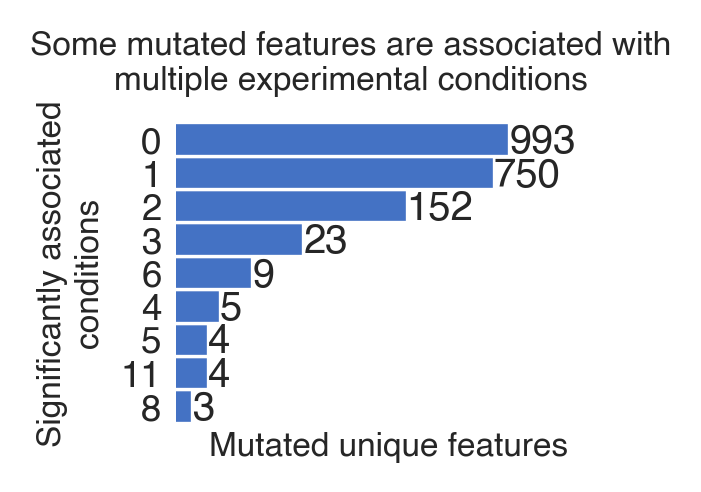

In [145]:
d = dict()  # unique feature (keys) to unique condition mapping (set of conditions)
for _, m in all_muts_df.iterrows():
    for gf in m["genomic features"]:
        ft_id = gf["RegulonDB ID"]  # more accurate representation than "name" since TFBS currently can be given same name
        if ft_id not in d.keys():
            d[ft_id] = set()
        for ac in gf['significantly associated conditions']:
            if ac not in d[ft_id]:
                d[ft_id].add(ac)

d2 = dict()
for k, v in d.items():
    d2[k] = len(v)

d3 = dict()
for v in d2.values():
    if v not in d3.keys():
        d3[v] = [0]  # using list to make building dataframe easier
    d3[v][0] += 1

df = pd.DataFrame.from_dict(d3)
df = df.T
df = df.rename(columns={0: "unique feature count"})
df = df.sort_values(by="unique feature count")
df

# This is specifically for the gdmuts MS, which doesn't need the number of genome annotations included

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")

ax = df.plot.barh(
#     y="count",
#     x="index",
#     color="#4C72B0",
    color="#4472C4",
#     figsize=(2,0.65),
    figsize=(1.5,1.4),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str(int(r["unique feature count"]))
    ax.text(r["unique feature count"], i-0.4,  s, fontname="Helvetica")
ax.xaxis.labelpad = 0
plt.xlabel('Mutated unique features', x=0.61, fontname="Helvetica", fontsize=8)
plt.ylabel('Significantly associated\nconditions', fontname="Helvetica", fontsize=8)

ax.axes.set_title("Some mutated features are associated with\nmultiple experimental conditions", fontsize=8, fontname="Helvetica")

# plt.savefig("./figs/gdmuts_AVA_mags.svg", format="svg")